In [1]:
#impoorting necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [2]:
#reading the data set into a csv file fpr a better view 
fuel_data = pd.read_csv('https://bit.ly/HDSC-StageOneDataset')
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# Question 1

In [3]:
a = [1,2,3,4,5,6]
b = [13, 21, 34]
A_B = a.extend(b)
print(A_B)

None


# Question 2

In [4]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Question 3

In [5]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
#Here i want to visualize the fuel cost per unit burned for each fuel type code 
#renaming it into a new data frame
x =pd.DataFrame(fuel_data.groupby('fuel_type_code_pudl').sum())

In [7]:
#changing the index to the deafult indexing 
x.index.name = 'fuel_type_code_pudl'
x.reset_index(inplace = True)
x

,fuel_type_code_pudl,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,988354,17133514,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,1425666,23040664,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,87851,1638430,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,913137,16186028,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,18448,334284,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,68026,884492,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


#### with this graph i was able to know the fuel_type_code that has the lowest average fuel_cost_per unit between 'Gas', 'Coal' and 'oil'

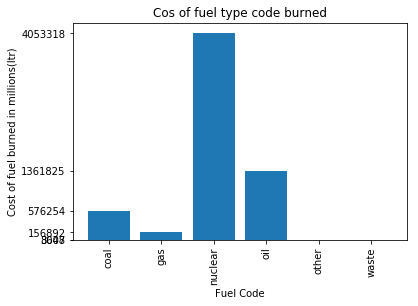

In [8]:

#the graph plotting 
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.title('Cos of fuel type code burned')

plt.bar(x.fuel_type_code_pudl, x.fuel_cost_per_unit_burned)

plt.xticks(rotation=90)
plt.xticks(x.fuel_type_code_pudl)
plt.yticks(x.fuel_cost_per_unit_burned)
plt.ylabel('Cost of fuel burned in millions(ltr)')
plt.xlabel('Fuel Code')
plt.show()

# Question 4

In [9]:
std = fuel_data.std()['fuel_mmbtu_per_unit'].round(2)
print('The Standard Deviation for fuel_mmbtu_per_unit is:', std)

seventy_five_percentile = fuel_data['fuel_mmbtu_per_unit'].describe()[6].round(2)
print('The 75th Percentile for fuel_mmbtu_per_unit is:', seventy_five_percentile)

The Standard Deviation for fuel_mmbtu_per_unit is: 10.6
The 75th Percentile for fuel_mmbtu_per_unit is: 17.01


# Question 5

In [10]:
sk = fuel_data['fuel_qty_burned'].skew().round(2)
print('Skewness =', sk)

kt = fuel_data['fuel_qty_burned'].kurt().round(2)
print('Kurtosis = ', kt)

Skewness = 15.85
Kurtosis =  651.37


# Question 6

In [11]:
#I want to know the column with missing value
fuel_data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [12]:

#Know the feature of which it belongs to
categorial_features = fuel_data.select_dtypes(include='object').columns.to_list()
categorial_features

['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']

In [13]:
missing_data=fuel_data.isna().sum()
print('Total number of missing data =', missing_data)

Total number of missing data = record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64


In [14]:
part_missing1 = fuel_data.isna().mean()[5]
print('The percentage of the missing data =',part_missing1)

The percentage of the missing data = 0.00609694136774718


# Question 7

In [15]:
print('categorical and mode impuation') 

categorical and mode impuation


# Question 9

In [16]:
fuel_data.head(2)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


In [17]:
coal_1998=fuel_data.groupby(['fuel_type_code_pudl','report_year'])['fuel_cost_per_unit_burned'].count()[4]
print('Coal: fuel cost per unit burned in 1998: ', coal_1998)

coal_1994=fuel_data.groupby(['fuel_type_code_pudl','report_year'])['fuel_cost_per_unit_burned'].count()[0]
print('Coal: fuel cost per unit burned in 1994: ', coal_1994)

Coal: fuel cost per unit burned in 1998:  431
Coal: fuel cost per unit burned in 1994:  475


In [18]:
percentage_change= coal_1998-coal_1994*coal_1994/100
print('percentage change in 1998 to 1994 =',  percentage_change)

percentage change in 1998 to 1994 = -1825.25


# Question 10

In [19]:
#perform a groupby function that calculate fuel_cost_per_unit_delivered over the years by reading it into a new data frame for better understanding 
#by doing this I was able to plot my graph with ease

all_sum_in_year = pd.DataFrame(fuel_data.groupby(by=fuel_data['report_year']).sum())

all_sum_in_year.head()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


In [20]:
#changing thye index of the data frame to the deafult indexing so that i can make use of my report_year
all_sum_in_year.index.name = 'report_year'
all_sum_in_year.reset_index(inplace = True)
all_sum_in_year.head()

,report_year,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1,1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
2,1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
3,1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
4,1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


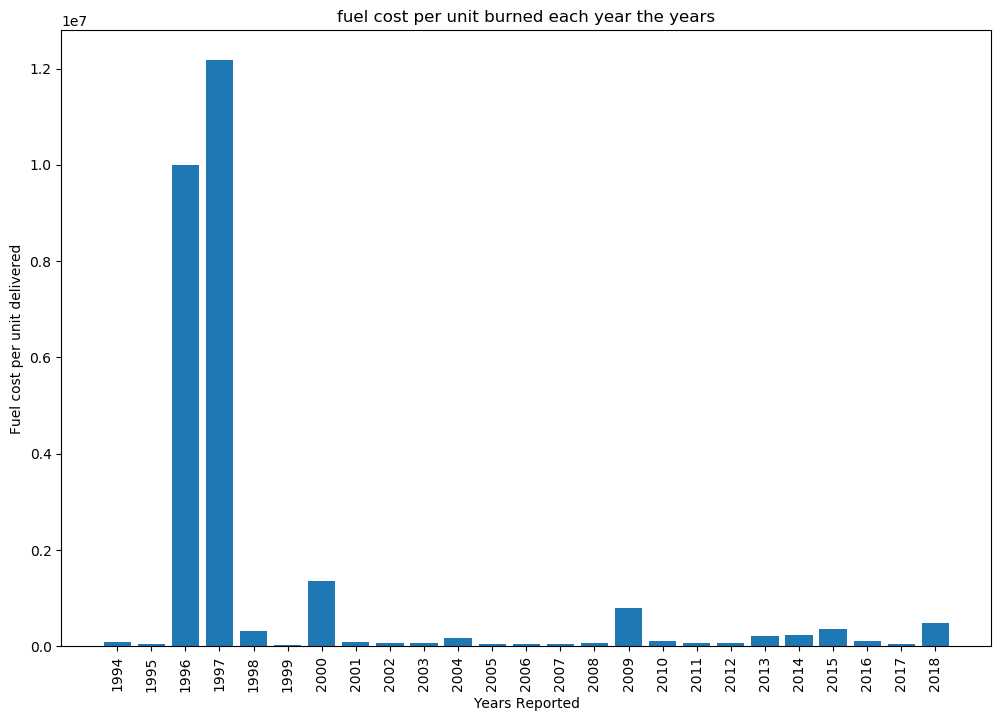

In [21]:
#by plotting this graph,I was able to know the highest average fuel cost per unit delievered which is '1997'
plt.figure(figsize=(12, 8))
plt.title('fuel cost per unit burned each year the years')

plt.bar(all_sum_in_year.report_year, all_sum_in_year.fuel_cost_per_unit_delivered)

plt.xticks(rotation=90)
plt.xticks(all_sum_in_year.report_year)
plt.ylabel('Fuel cost per unit delivered')
plt.xlabel('Years Reported')
plt.show()